In [1]:
from graph_class import Graph
import os
import numpy as np
from scipy.sparse.linalg import eigsh
from scipy.sparse import csr_matrix
from spectral_drawing import *
from graph_collection import *


[[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.]
 [1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1.

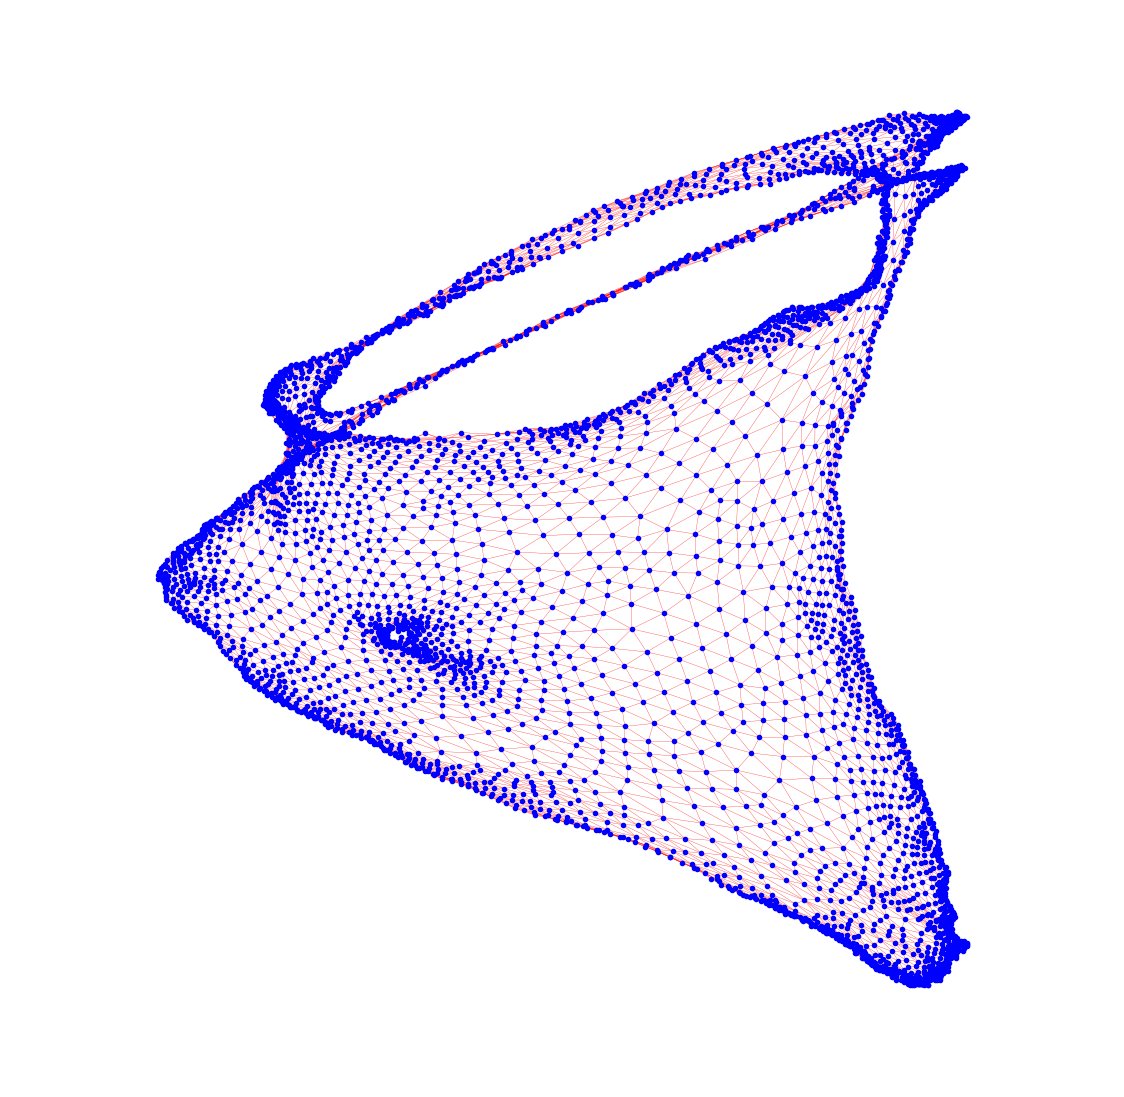

In [33]:
from graph_collection import regular_graph
from graph_class import Graph
from graph_plot import graph_plot
from spectral_drawing import degree_normalized_eigenvectors
from lanczos import implicitly_restarted_lanczos
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import eigsh
import os

G = regular_graph(20, 4)

f = open('../data/3elt.graph')
G2 = Graph(f)
G = G2

M = 0.5*(np.eye(G.n_nodes) + np.diag(1/(G.degs)) @ G.adj_matrix)
Ms = csr_matrix(M)
k = 3

U, times = degree_normalized_eigenvectors(G, k)

lambdal, Ul = eigsh(Ms, k=3, which='LM')

print(Ul[:, 0].T @ Ms @ Ul[:, 0])
print(Ul[:, 1].T @ Ms @ Ul[:, 1])
print(Ul[:, 2].T @ Ms @ Ul[:, 2])

print(Ul[:, 1].T @ np.diag(G.degs) @ Ul[:, 0])

x_coord = Ul[:, 0]
y_coord = Ul[:, 1]

graph_plot(G, x_coord, y_coord, add_labels=False, save_fig=False)

In [2]:
f = open('../data/3elt.graph')
G = Graph(f)

A = np.load('../src/sbm_500_5_99_99.npy')
A = np.loadtxt('../data/graph.txt')

G1 = Graph()
G1.set_adj_matrix(A)

N_nodes_regular = 5
G = regular_graph(N_nodes_regular, 2)

 2 5 4

[[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [0. 1. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]]


In [3]:
G = G1
A = G.adj_matrix
D_inv = np.diag(1/(G.degs))

In [4]:
U, times = degree_normalized_eigenvectors(G, N_nodes_regular - 2)

Finding  1 -th eigenvector...
Convergence reached for eigenvector u^ 2
Finding  2 -th eigenvector...
Convergence reached for eigenvector u^ 3
Finding  3 -th eigenvector...
last residual =  1.5583091252713288e-05


In [5]:
M = 0.5*(np.eye(G.n_nodes) + D_inv@A)

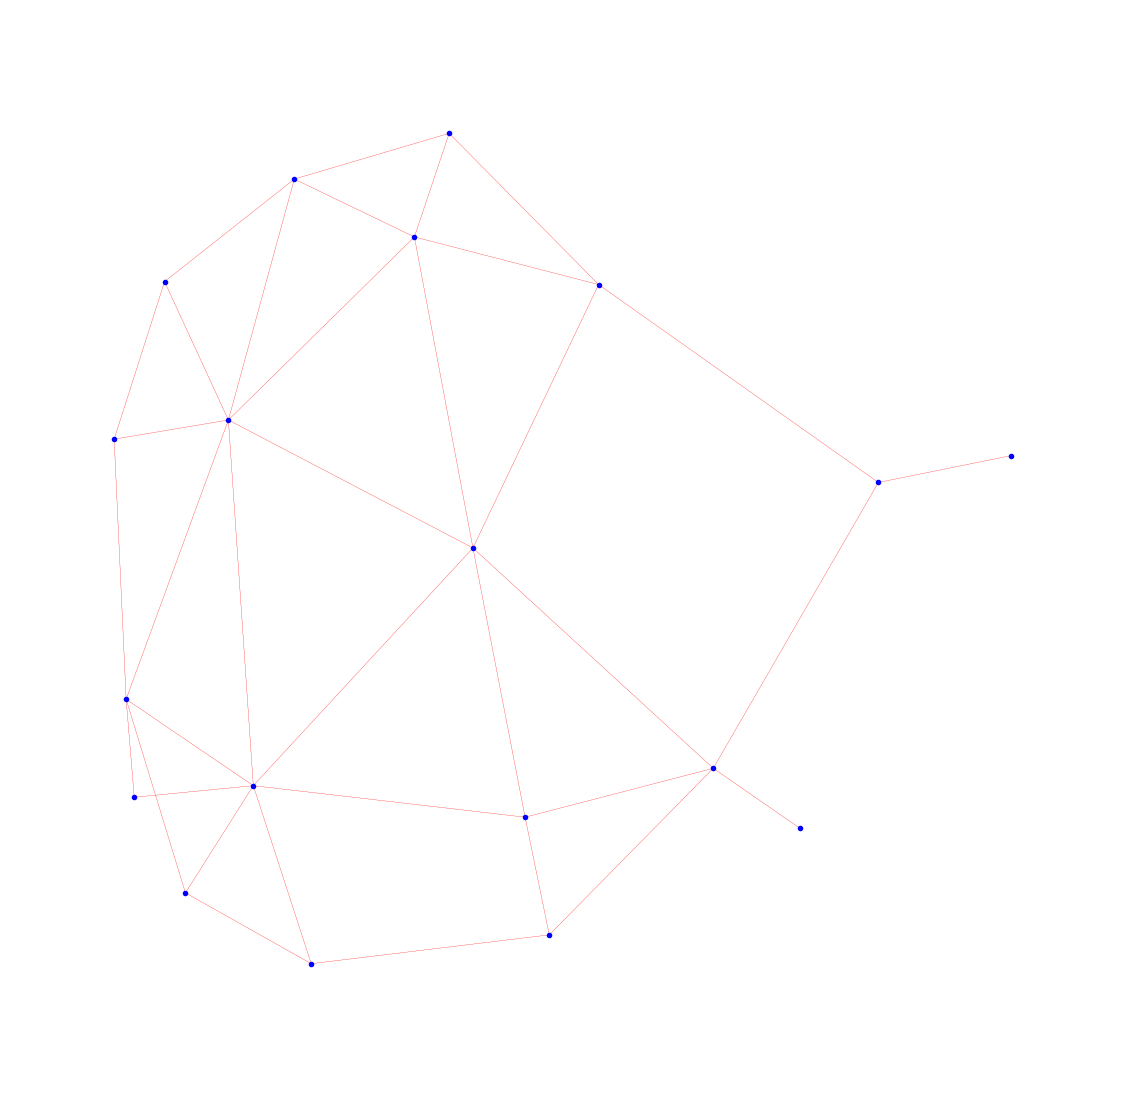

In [6]:
x_coord = U[:,0]
y_coord = U[:,1]
graph_plot(G, x_coord, y_coord, save_fig=False, add_labels=False)

In [7]:
for u in np.arange(np.shape(U)[1]):
    print('eigval', u + 1,'->', U[:,u].T @ M @ U[:,u] )
    for v in np.arange(np.shape(U)[1]):
        print(U[:,u].T @ np.diag(G.degs) @ U[:,v])
    
    print(' ')

eigval 1 -> 0.8932805727356325
2.598143440571942
-0.004915070222256013
5.413720188751636e-06
 
eigval 2 -> 0.8842710518551373
-0.004915070222255957
3.5070952257838304
-0.0005901917000579876
 
eigval 3 -> 0.7695206664019157
5.413720188751636e-06
-0.0005901917000579737
1.964557872015785
 


In [8]:
U[:,0].T @ U[:,0]

0.9999999999999998

In [9]:
np.ones(G.n_nodes).T @ M @ np.ones(G.n_nodes) / G.n_nodes

1.0000000000000002

In [10]:
U[:,0].T @ M @ U[:,0]

0.8932805727356325

In [11]:
U[:,1].T @ M @ U[:,1]

0.8842710518551373

In [12]:
U[:,2].T @ M @ U[:,2]

0.7695206664019157

In [13]:
U[:,3].T @ M @ U[:,3]

IndexError: index 3 is out of bounds for axis 1 with size 3